##### Importing modules

In [32]:
import pandas as pd
import numpy as np
from formulas_daily import Tablas2,Analisisdiscreto,full_divisas, boxplot
import sopres_rectangulo_new as sopre
import seaborn as sns
import matplotlib.pyplot as plt

### Creation of divisa we use the formula Tablas2 from formulas_daily and selecting columns

In [33]:
currency= Tablas2('EURUSD1440.csv')
currency=Analisisdiscreto(currency)
currency=currency[['Open', 'High', 'Low', 'Close','Vol','percambio','cum7', 'cum20','cum60' , 'cumyear']]

### Creating a dictionary to pass it to visiondicdivisas

In [34]:
# This formula plot the last five values for a given column and plot a line 

In [35]:
def boxplot(currency,column,rango=5):

    grafica=sns.boxplot(currency[column], fliersize=5)
    divisa_ayer=currency.iloc[:-1]
    index_ayer=divisa_ayer.index.tolist()[-rango:]
    index_ayer=[value.strftime('%Y-%m-%d') for value in index_ayer] # getting str format from index_ayer
    rango=rango+1
    colores=['red','magenta','orange','green','blue']
    index_color=0
    for i in range(1,rango):

        grafica.axvline(divisa_ayer[column][-i], color=colores[index_color],label=index_ayer[-i],linewidth=2)
        index_color+=1
    grafica.legend(fontsize=10)
    plt.title(column + ' semanal',fontsize=14)
    plt.tick_params(axis='both', which= 'major', labelsize=14)
    plt.show()

In [36]:
def currency_vision(currency):
    print(currency.iloc[-10:]) # print the last 30 values
    boxplot(currency,'percambio')
    boxplot(currency,'Vol')

               Open     High      Low    Close     Vol  percambio   cum7  cum20  cum60  cumyear            tipovol
Date                                                                                                              
2017-10-04  1.17424  1.17874  1.17347  1.17593   98392   0.131132  0.135 -1.305  3.069   11.228    negat > Volstd1
2017-10-05  1.17601  1.17783  1.16986  1.17090   97173  -0.427747 -0.652 -2.612  2.771   10.800    negat > Volstd1
2017-10-06  1.17100  1.17383  1.16688  1.17330  114348   0.204971 -0.680 -2.517  2.354   11.005        Vol > media
2017-10-09  1.17350  1.17554  1.17191  1.17404   56672   0.063070  0.080 -1.772  2.327   11.068  negat > Volstd333
2017-10-10  1.17400  1.18248  1.17388  1.18072   97943   0.568976  0.540 -1.317  2.244   11.637                  N
2017-10-11  1.18089  1.18686  1.17947  1.18609  103273   0.454807  0.864 -0.186  3.024   12.092                  N
2017-10-12  1.18600  1.18794  1.18264  1.18296   92193  -0.263892  1.028 -0.721 

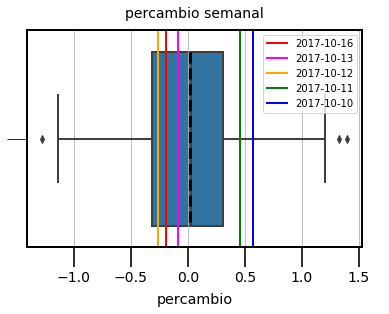

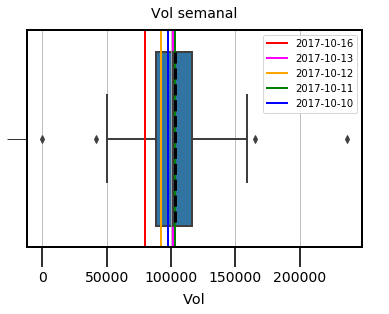

In [37]:
currency_vision(currency)